<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [37]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score

from sklearn.utils import shuffle

import numpy as np

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('/datasets/Churn.csv')

In [39]:
# Посомтрим размер датасета
df.shape

(10000, 14)

In [40]:
# Посмотрим первые 10
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [41]:
# Посмотрим случайные 10
df.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3471,3472,15743582,T'ang,632,France,Female,27,NaN,107375.82,1,1,1,62703.38,0
3700,3701,15747345,Bergamaschi,678,France,Female,22,6.0,118064.93,2,1,1,195424.01,0
2333,2334,15635972,Lloyd,484,Spain,Male,36,8.0,0.00,2,1,0,186136.48,0
9500,9501,15645600,Obidimkpa,739,Spain,Female,27,8.0,98926.40,1,1,1,106969.98,0
5830,5831,15810711,Marcum,684,Germany,Male,37,NaN,138476.41,2,1,1,52367.29,0
9519,9520,15782121,Leonard,610,France,Female,27,2.0,0.00,2,1,0,14546.76,0
8511,8512,15770091,Edwards,643,Germany,Male,28,9.0,160858.13,2,1,0,27149.27,0
9978,9979,15703563,P'eng,774,France,Male,40,9.0,93017.47,2,1,0,191608.97,0
1240,1241,15617934,Septimus,579,France,Male,36,9.0,129829.59,1,1,1,60906.12,0
2488,2489,15571148,Baranov,645,Spain,Female,21,1.0,0.00,2,0,0,28726.07,0


In [42]:
# Посмотрим последние 10
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3.0,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.0,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7.0,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [43]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [45]:
# посомтрим нулевые столбцы
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

`Tenure` -  сколько лет человек является клиентом банка имеет пустые ячеки посмотрим какие уникальные данные в нем есть.

In [46]:
df.Tenure.unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Похоже, что по какойто причине не заполнили 909 значений в датасете

In [47]:
# Удалим nan посмотрим, что вышло
df = df[df.Tenure.notna()].copy()
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [48]:
df.shape

(9091, 14)

In [49]:
# удалим столбцы которые не несут информации о пользователи
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [50]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Проведем унитарное кодирование столбцов `Geography` и `Gender`.

In [51]:
# посмотрим что в этих столбцах
print(df.Geography.unique())
print(df.Gender.unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


Много столбцов не будет, можно кодировать

In [52]:
df_code = pd.get_dummies(df, columns=['Geography', 'Gender'], prefix=['city','gender'])
df_code.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,city_France,city_Germany,city_Spain,gender_Female,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Нашел пустые элемнты в столбце `Tenure` и удалил их.  
Преобразовал категориальные столбцы `Geography` и `Gender` в цифры.
Стандартизируем численные признаки `CreditScore`, `Age`, `Balance`, `EstimatedSalary`.

## Исследование задачи

In [54]:
features = df_code.drop(['Exited'], axis=1)
target = df_code['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

In [72]:
# Стандартизируем численные признаки с помощью StandardScaler
scaler = StandardScaler()
columns_to_transform = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler.fit(features_train[columns_to_transform])
features_train[columns_to_transform] = scaler.transform(features_train[columns_to_transform]).copy()
features_valid[columns_to_transform] = scaler.transform(features_valid[columns_to_transform]).copy()
features_test[columns_to_transform] = scaler.transform(features_test[columns_to_transform]).copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
scaler = StandardScaler()
columns_to_transform = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler.fit(df_code[columns_to_transform])

In [75]:
print(f'Количесво элементов в Тренеровочной выборке {target_train.shape[0]}')
print(f'Количесво элементов в Валидационной выборке {target_valid.shape[0]}')
print(f'Количесво элементов в Тестовой выборке {target_test.shape[0]}')

Количесво элементов в Тренеровочной выборке 5454
Количесво элементов в Валидационной выборке 1819
Количесво элементов в Тестовой выборке 1818


In [58]:
target_test.value_counts(normalize=True)[0]
print(f'Количесво ушедших в выборке {target_test.value_counts(normalize=True)[0]}')
print(f'Количесво ушедших в "Валидационной" выборке {target_test.value_counts(normalize=True)[0]}')
print(f'Количесво ушедших в "Тестовой" выборке {target_test.value_counts(normalize=True)[0]}')

Количесво ушедших в выборке 0.7926292629262927
Количесво ушедших в "Валидационной" выборке 0.7926292629262927
Количесво ушедших в "Тестовой" выборке 0.7926292629262927


Попробую дерево решений

In [59]:
modelD = DecisionTreeClassifier(random_state=12345, max_depth=11)
modelD.fit(features_train, target_train)
predictions_validD = modelD.predict(features_valid)
result_ac = accuracy_score(target_valid, predictions_validD)
result_f1 = f1_score(target_valid, predictions_validD)
print(f'Точность accuracy_score: {result_ac}')
print(f'Точность f1_score: {result_f1}')

Точность accuracy_score: 0.8383727322704783
Точность f1_score: 0.5273311897106109


Попробую случайный лес

In [60]:
modelR = RandomForestClassifier(random_state=12345, n_estimators=10)
modelR.fit(features_train, target_train)
predictions_validR = modelR.predict(features_valid)
result_ac = accuracy_score(target_valid, predictions_validR)
result_f1 = f1_score(target_valid, predictions_validR)
print(f'Точность accuracy_score: {result_ac}')
print(f'Точность f1_score: {result_f1}')

Точность accuracy_score: 0.857064321055525
Точность f1_score: 0.5238095238095238


Попробую логистическую регрессию

In [61]:
"""modelL = LogisticRegression(random_state=12345, solver='lbfgs')
modelL.fit(features_train, target_train)
predictions_validL = modelL.predict(features_valid)
result_ac = accuracy_score(target_valid, predictions_validL)
result_f1 = f1_score(target_valid, predictions_validL)
print(f'Точность accuracy_score: {result_ac}')
print(f'Точность f1_score: {result_f1}')"""

Точность accuracy_score: 0.8257284222100055
Точность f1_score: 0.32119914346895073


<div class="alert alert-block alert-info">
<b>Совет: </b> Уже на этом шаге можно было подобрать параметры.
</div>

# Борьба с дисбалансом

Попробую дерево решений

In [62]:
criterions = ('gini', 'entropy')
max_featuress = ('auto', 'sqrt', 'log2', None)
best_result = 0
for crit in criterions:
    for max_f in max_featuress:
        for dept in range(1,10):
            modelD = DecisionTreeClassifier(random_state=1234, max_depth=dept, criterion=crit, max_features=max_f, class_weight='balanced')
            modelD.fit(features_train, target_train)
            predictions_validD = modelD.predict(features_valid)
            result = f1_score(target_valid, predictions_validD)
            if result > best_result:
                best_result = result
                best_crit = crit
                best_max_f = max_f
                best_dept = dept
                best_accuracy = result
                best_modelD = modelD
print(f'f1_score: {best_result}, max_depth: {best_dept}, criterion: {best_crit}, max_features: {best_max_f}')

f1_score: 0.5653631284916201, max_depth: 5, criterion: gini, max_features: None


Попробую случайный лес

In [63]:
best_result = 0
for est in range(1, 101, 10):
    for dept in range(1,16):
        modelR = RandomForestClassifier(random_state=1234, n_estimators = est, max_depth=dept, class_weight='balanced')
        modelR.fit(features_train, target_train)
        predictions_validR = modelR.predict(features_valid)
        result = f1_score(target_valid, predictions_validR)
        if result > best_result:
            best_result = result
            best_est = est
            best_dept = dept
            best_accuracy = result
            best_modelR = modelR
            
print(f'f1_score: {best_accuracy}, max_depth: {best_dept}, n_estimators: {best_est}')

f1_score: 0.6216216216216216, max_depth: 11, n_estimators: 91


Попробую логистическую регрессию

In [64]:
best_result = 0
solvers = ('lbfgs', 'liblinear')
for solver in solvers:
    modelL = LogisticRegression(random_state=1234, solver=solver)
    modelL.fit(features_train, target_train)
    predictions_validL = modelL.predict(features_valid)
    result = f1_score(target_valid, predictions_validL)
    if result > best_result:
        best_result = result
        best_solv = solver
        best_modelL = modelL
        best_accuracy = result
        
print(f'f1_score: {best_accuracy}, max_depth: {best_solv}')

f1_score: 0.32119914346895073, max_depth: lbfgs


In [65]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

#features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)
#features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

Попробую дерево решений c повышением

In [66]:
# f1_score: 0.5653631284916201, max_depth: 5, criterion: gini, max_features: None
best_i = 0
best_result = 0
for i in range(1,30):
    features_upsampled, target_upsampled = upsample(features_train, target_train, i)
    modelD = DecisionTreeClassifier(random_state=12345, max_depth=5, criterion='gini', max_features=None, class_weight='balanced')
    modelD.fit(features_upsampled, target_upsampled)
    predictions_validD = modelD.predict(features_valid)
    result = f1_score(target_valid, predictions_validD)
    if result > best_result:
        best_result = result
        best_i = i
        best_modelD = modelD
print(f'f1_score: {best_result}, best_i: {best_i}')

f1_score: 0.5653631284916201, best_i: 1


Попробую случайный лес c повышением

In [71]:
# best_accuracy: 0.6206896551724138, max_depth: 11, n_estimators: 91
best_i = 0
best_result = 0
for i in range(1,30):
    features_upsampled, target_upsampled = upsample(features_train, target_train, i)
    modelR = RandomForestClassifier(random_state=12345, n_estimators = 91, max_depth=11, class_weight='balanced')
    modelR.fit(features_upsampled, target_upsampled)
    predictions_validR = modelR.predict(features_valid)
    result = f1_score(target_valid, predictions_validR)
    if result > best_result:
        best_result = result
        best_est = est
        best_dept = dept
        best_accuracy = result
        best_modelR = modelR
print(f'f1_score: {best_accuracy}, max_depth: {best_dept}, n_estimators: {best_est}')

f1_score: 0.6056701030927836, max_depth: 15, n_estimators: 91


Попробую случайный лес c понижением

In [68]:
best_i = 0
best_result = 0
for i in np.arange(0.01, 1.0, 0.01):
    features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)
    modelR = RandomForestClassifier(random_state=12345, n_estimators = 91, max_depth=11, class_weight='balanced')
    modelR.fit(features_downsampled, target_downsampled)
    predictions_validR = modelR.predict(features_valid)
    result = f1_score(target_valid, predictions_validR)
    if result > best_result:
        best_result = result
        best_est = est
        best_dept = dept
        best_accuracy = result
        best_modelR = modelR
print(f'f1_score: {best_accuracy}, max_depth: {best_dept}, n_estimators: {best_est}')

f1_score: 0.45788336933045354, max_depth: 15, n_estimators: 91


### Вывод
Самый лучший результат был достигнут на моделе случайный лес max_depth: 11, n_estimators: 61

## Тестирование модели

In [69]:
modelR = RandomForestClassifier(n_estimators = 91, max_depth=11, class_weight='balanced', random_state=12345)
modelR.fit(features_train, target_train)
predictions_validR = modelR.predict(features_valid)
result = f1_score(target_valid, predictions_validR)
print('Точность Accuracy:', accuracy_score(target_valid, predictions_validR))
print('Точность F1:', f1_score(target_valid, predictions_validR))

Точность Accuracy: 0.8609125893347993
Точность F1: 0.6195488721804511


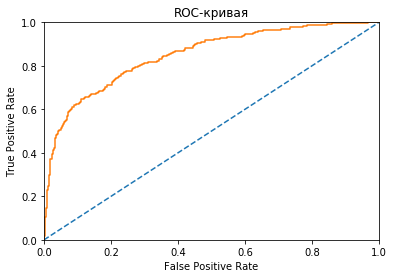

In [70]:
#Отрисуем ROC Кривую
probabilities_valid = modelR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

__Вывод__  
На ROC кривой наша модель выглядит намного лучше случайной.  
Лучшей моделью был выбран Случайный лес с параметрами n_estimators = 91, max_depth=11  
улучшить модель с помощью уменьшения или увеличения выборки мне не удалось.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*